<a href="https://colab.research.google.com/github/EnigmaCipher/Credit_Card_Fraud/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import colors


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [70]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [71]:
df.shape

(284807, 31)

In [72]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [73]:
df['Class'].unique()

array([0, 1])

In [74]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [75]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

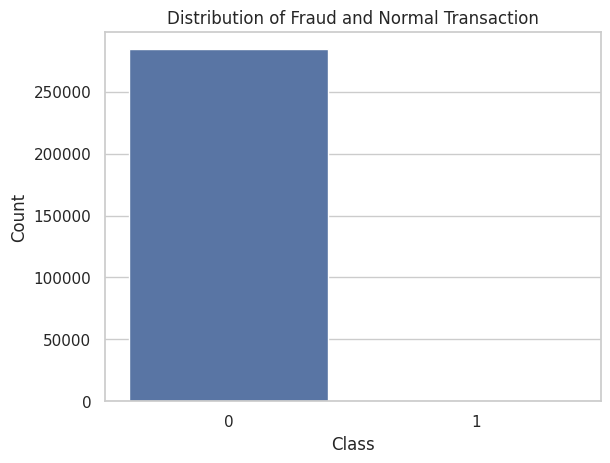

In [76]:
sns.set_style("whitegrid")
sns.countplot(data=df, x='Class')
sentiment_counts = df['Class'].value_counts()
# Set the plot title and labels
plt.title('Distribution of Fraud and Normal Transaction')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [77]:
fig = px.pie(
    df,
    names="Class",
    title="Distribution of Fraud and Normal Transactions: (Normal: 0 | Fraud: 1)",
    template="seaborn",
    width=700,
    height=400
)

fig.show()

In [78]:
corr = df.corr()
df.style.background_gradient()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


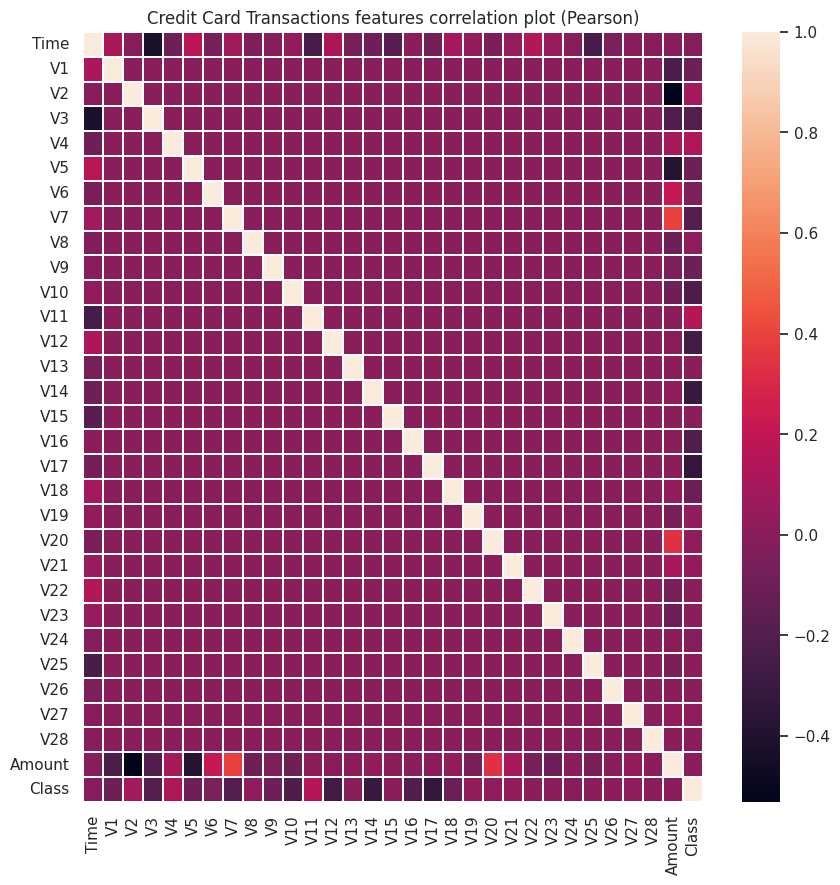

In [79]:

plt.figure(figsize=(10, 10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1)
plt.show()

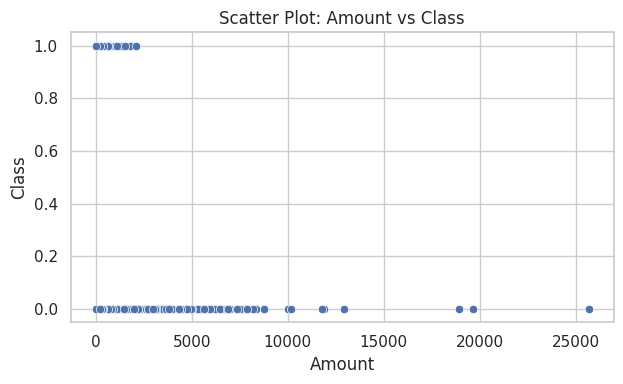

In [80]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 2)
sns.scatterplot(x='Amount', y='Class', data=df)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Scatter Plot: Amount vs Class')


plt.tight_layout()


plt.show()

Text(0.5, 1.0, 'Box Plot: Hour vs Class')

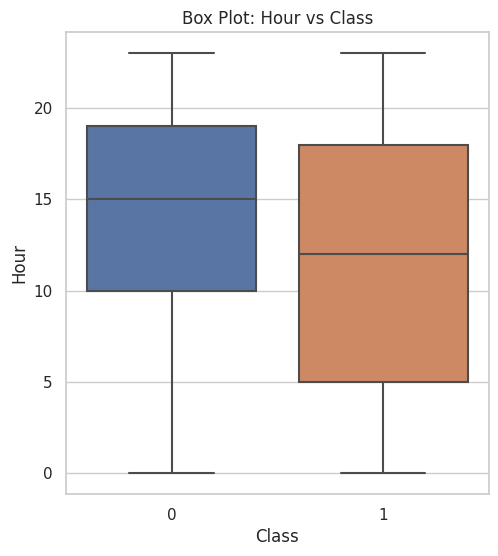

In [81]:

df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Hour', data=df)
plt.xlabel('Class')
plt.ylabel('Hour')
plt.title('Box Plot: Hour vs Class')

In [82]:
from plotly.subplots import make_subplots


count_0 = df[df['Class'] == 0].groupby('Hour').count()["Class"]
count_1 = df[df['Class'] == 1].groupby('Hour').count()["Class"]


counts_df = pd.concat([count_0, count_1], axis=1, keys=["Non-Frauds", "Frauds"]).fillna(0)
df_counts = counts_df.reset_index()


fig = make_subplots(rows=1, cols=2, subplot_titles=("Non-Fraudulent Transactions", "Fraudulent Transactions"))

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Non-Frauds"], name="Non-Frauds", line=dict(color="#1E90FF")),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Frauds"], name="Frauds", line=dict(color="#FF4500")),
              row=1, col=2)


fig.update_xaxes(title_text="Hour", row=1, col=1)
fig.update_yaxes(title_text="Transaction Count", row=1, col=1)
fig.update_xaxes(title_text="Hour", row=1, col=2)
fig.update_yaxes(title_text="Transaction Count", row=1, col=2)


fig.update_layout(title_text="Transaction Counts for Non-Fraudulent and Fraudulent Transactions Over Time")


fig.show()

In [83]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [84]:
X=df.drop(columns='Class',axis=1)
y=df['Class']

In [85]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc=StandardScaler()

X_train_processed=sc.fit_transform(X_train)
X_test_processed=sc.transform(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#Logistic Regression Model
baseline_model = LogisticRegression(max_iter=100)

#Hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' = Lasso, 'l2' = Ridge)
    'C': [0.01, 0.1, 0.5, 1],  # Regularization parameter
}
grid_search = GridSearchCV(baseline_model, param_grid, cv=7)
grid_search.fit(X_train_processed, y_train)

model1 = grid_search.best_estimator_

# Model evaluation
y_pred = model1.predict(X_test_processed)

print(model1.score(X_train_processed,y_train))
print(model1.score(X_test_processed,y_test))

0.9992275450415853
0.9991222218320986


In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: On Logistic Regression Model")
print(conf_matrix)

Confusion Matrix: On Logistic Regression Model
[[56855     9]
 [   41    57]]


In [91]:
print("Classification Report: On Logistic Regression Model")
print(classification_report(y_test, y_pred))

Classification Report: On Logistic Regression Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

